## Exploratory Data Analysis

## Total EVs

Data_Year                 0
Quarter               10034
County                    0
FUEL_TYPE                 0
MAKE                      0
MODEL                     0
Number of Vehicles        0
dtype: int64
4199
4199


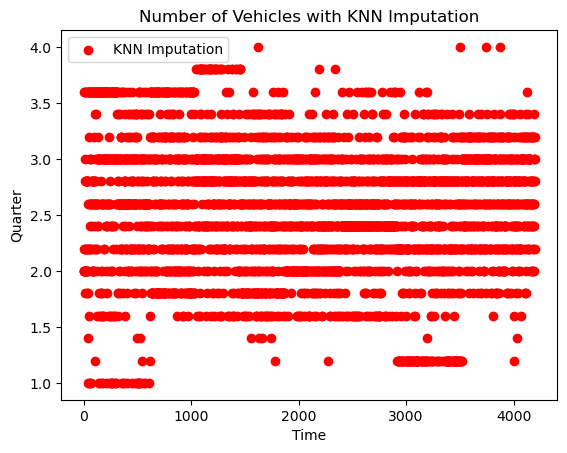

    Data_Year Quarter  Number of Vehicles
0        2010      Q1                   4
1        2010      Q2                 358
2        2010      Q3                 108
3        2010      Q4                  12
4        2011      Q1                  71
5        2011      Q2                2981
6        2011      Q3                1995
7        2011      Q4                  32
8        2012      Q1                  52
9        2012      Q2                3244
10       2012      Q3                1721
11       2012      Q4                 138
12       2013      Q1                2274
13       2013      Q2                6943
14       2013      Q3               11865
15       2013      Q4                  85
16       2014      Q1                1620
17       2014      Q2               15656
18       2014      Q3               12030
19       2014      Q4                 214
20       2015      Q1                   0
21       2015      Q2               20488
22       2015      Q3             

In [54]:
import pandas as pd
import numpy as np
from sklearn.impute import KNNImputer
import matplotlib.pyplot as plt

# Loading data
file_path = '/Users/ngtrg_/Desktop/California Data/CSV/Total EV in California.xlsx'

# Read data from sheet "County"
df5 = pd.read_excel(file_path, sheet_name='County')

num_rows = len(df5)
null_counts = df5.isnull().sum()
print(null_counts)

# Filter the data by the values 'Electric' in the 'FUEL_TYPE' column
filtered_df5 = df5[df5['FUEL_TYPE'].isin(['Electric'])]

# Exclude rows with the year 2024
cleaned_df5 = filtered_df5[filtered_df5['Data_Year'] != 2024]

# Keep only 'Data_Year', 'Quarter', and 'Number of Vehicles' columns
final5 = cleaned_df5[['Data_Year', 'Quarter', 'Number of Vehicles']]

# Exclude data between 1998 and 2009
final5 = final5[(final5['Data_Year'] < 1998) | (final5['Data_Year'] > 2009)]

# Resetting index after filtering
final5 = final5.reset_index(drop=True)

# Replace quarter values with numeric values
final5['Quarter'] = final5['Quarter'].replace({'Q4': 4, 'Q3': 3, 'Q2': 2, 'Q1': 1})

# Create a copy to avoid modifying the original DataFrame
df_imputed = final5[['Data_Year', 'Quarter', 'Number of Vehicles']].copy()

# Identify rows with missing 'Quarter' values
missing_quarter_indices = df_imputed[df_imputed['Quarter'].isna()].index

# Define features for KNN Imputer
features = ['Number of Vehicles', 'Data_Year']
feature_matrix = df_imputed[features].values

# Use the KNN Imputer
imputer = KNNImputer(n_neighbors=5)
imputed_matrix = imputer.fit_transform(df_imputed)

# Update the DataFrame with imputed 'Quarter' values
df_imputed.loc[missing_quarter_indices, 'Quarter'] = imputed_matrix[missing_quarter_indices, df_imputed.columns.get_loc('Quarter')]

# Verify lengths
print(len(missing_quarter_indices))
print(len(df_imputed.loc[missing_quarter_indices, 'Quarter']))

# Plot the results
plt.scatter(missing_quarter_indices, df_imputed.loc[missing_quarter_indices, 'Quarter'], color='red', label='KNN Imputation')
plt.title('Number of Vehicles with KNN Imputation')
plt.xlabel('Time')
plt.ylabel('Quarter')
plt.legend()
plt.show()

# Round and replace the numeric quarter values back to string format
df_imputed['Quarter'] = round(df_imputed['Quarter'], 0)
df_imputed['Quarter'] = df_imputed['Quarter'].replace({4: 'Q4', 3: 'Q3', 2: 'Q2', 1: 'Q1'})

# Sum the 'Number of Vehicles' for each 'Data_Year' and 'Quarter' combination
df_imputed = df_imputed.groupby(['Data_Year', 'Quarter'])['Number of Vehicles'].sum().reset_index()

# Create a MultiIndex DataFrame with all combinations of years and quarters
years = df_imputed['Data_Year'].unique()
quarters = ['Q1', 'Q2', 'Q3', 'Q4']
full_index = pd.MultiIndex.from_product([years, quarters], names=['Data_Year', 'Quarter'])

# Set the index of the imputed DataFrame and reindex with the full index
df_imputed.set_index(['Data_Year', 'Quarter'], inplace=True)
quarterly_ev_totals = df_imputed.reindex(full_index, fill_value=0).reset_index()

# Display the quarterly totals
print(quarterly_ev_totals)


## Total EV charging stations

In [55]:
import pandas as pd

# Loading data 
file_path = '/Users/ngtrg_/Desktop/California Data/CSV/alt_fuel_stations (Jun 30 2024).csv'

# Read data from the CSV file
df4 = pd.read_csv(file_path)

# Select only the desired columns
filtered_data4 = df4[['Fuel Type Code', 'Open Date', 'Groups With Access Code','Latitude', 'Longitude','ZIP','State']]

# Filter out rows where "Groups With Access Code" is "TEMPORARILY UNAVAILABLE (Public)"
filtered_data4 = filtered_data4[filtered_data4['Groups With Access Code'] != 'TEMPORARILY UNAVAILABLE (Public)']

# Check and convert the "Open Date" column to datetime format
filtered_data4['Open Date'] = pd.to_datetime(filtered_data4['Open Date'], errors='coerce')

# Filter out dates before 2010 and after 2023
filtered_data4 = filtered_data4[
    (filtered_data4['Open Date'] >= '2010-01-01') & 
    (filtered_data4['Open Date'] <= '2023-12-31')
]

# Add columns for year and quarter
filtered_data4['Year'] = filtered_data4['Open Date'].dt.year
filtered_data4['Quarter'] = filtered_data4['Open Date'].dt.quarter

# Group by year and quarter and count the number of entries
stations_quarterly_counts = filtered_data4.groupby(['Year', 'Quarter']).size().reset_index(name='Charging Stations Count')

# Create a MultiIndex DataFrame with all combinations of years and quarters
years = range(2010, 2024)
quarters = [1, 2, 3, 4]
full_index = pd.MultiIndex.from_product([years, quarters], names=['Year', 'Quarter'])

# Set the index of the counts DataFrame and reindex with the full index
stations_quarterly_counts.set_index(['Year', 'Quarter'], inplace=True)
stations_quarterly_counts = stations_quarterly_counts.reindex(full_index, fill_value=0).reset_index()

# Display the quarterly counts
print(stations_quarterly_counts)

filtered_data4

    Year  Quarter  Charging Stations Count
0   2010        1                        1
1   2010        2                        1
2   2010        3                        0
3   2010        4                        2
4   2011        1                       77
5   2011        2                        1
6   2011        3                        5
7   2011        4                       25
8   2012        1                       43
9   2012        2                       22
10  2012        3                       17
11  2012        4                       15
12  2013        1                       44
13  2013        2                       20
14  2013        3                       28
15  2013        4                       21
16  2014        1                       35
17  2014        2                       34
18  2014        3                       64
19  2014        4                       65
20  2015        1                       80
21  2015        2                      117
22  2015   

/var/folders/db/j44xpl_d6sg85_vp_lyv00br0000gn/T/ipykernel_19394/1918557585.py:7: DtypeWarning:

Columns (6,20,31,46,69) have mixed types. Specify dtype option on import or set low_memory=False.



Fuel Type Code  Open Date            Groups With Access Code  \
3               ELEC 2012-12-11                Public - Call ahead   
8               ELEC 2012-05-04                             Public   
13              ELEC 2011-12-12                             Public   
17              ELEC 2019-04-08                             Public   
23              ELEC 2019-11-01                             Public   
...              ...        ...                                ...   
17481           ELEC 2023-12-13  Public - Credit card at all times   
17482           ELEC 2023-12-14  Public - Credit card at all times   
17483           ELEC 2023-12-21  Public - Credit card at all times   
17484           ELEC 2023-12-28  Public - Credit card at all times   
17496           ELEC 2023-12-01                             Public   

           Latitude       Longitude              ZIP State  Year  Quarter  
3     34.2216650000 -118.4683710000 91343.0000000000    CA  2012        4  
8     33.7637000000 -118.1920000000 90802.0000000000    CA  2012        2  
13    33.8240040000 -116.5435890000 92262.0000000000    CA  2011        4  
17    34.0100210000 -118.4958300000 90405.0000000000    CA  2019        2  
23    38.5996930000 -121.4270450000 95815.0000000000    CA  2019        4  
...             ...             ...              ...   ...   ...      ...  
17481 33.6312200000 -117.7217900000            92618    CA  2023        4  
17482 33.1978680000 -117.2491530000            92083    CA  2023        4  
17483 33.6844400000 -117.9894200000            92648    CA  2023        4  
17484 32.8031000000 -116.9732600000            92020    CA  2023        4  
17496 38.6404700000 -122.8737100000            95448    CA  2023        4  

[14874 rows x 9 columns]

/Users/ngtrg_/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/Users/ngtrg_/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/Users/ngtrg_/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/Users/ngtrg_/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/Users/ngtrg_/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is d

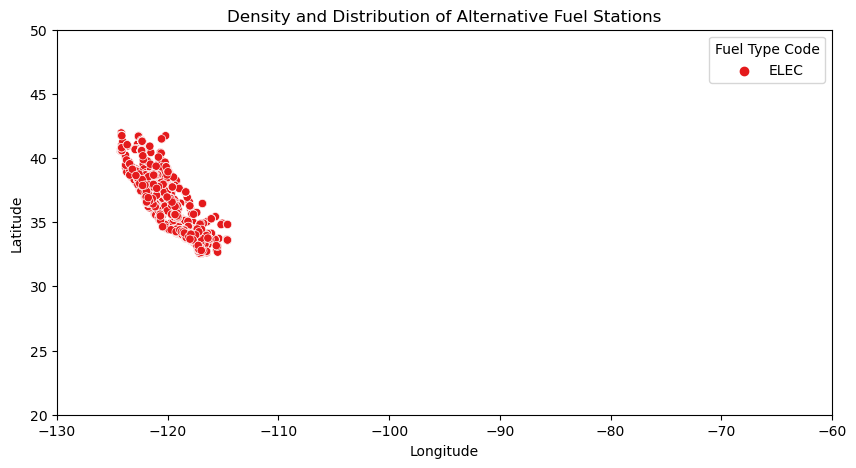

In [56]:
import seaborn as sns

# Plotting the scatter plot
plt.figure(figsize=(10, 5))
sns.scatterplot(x='Longitude', y='Latitude', data=filtered_data4, hue='Fuel Type Code', palette='Set1')
plt.xlim(-130, -60)
plt.ylim(20, 50)
plt.title('Density and Distribution of Alternative Fuel Stations')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(title='Fuel Type Code')
plt.show()

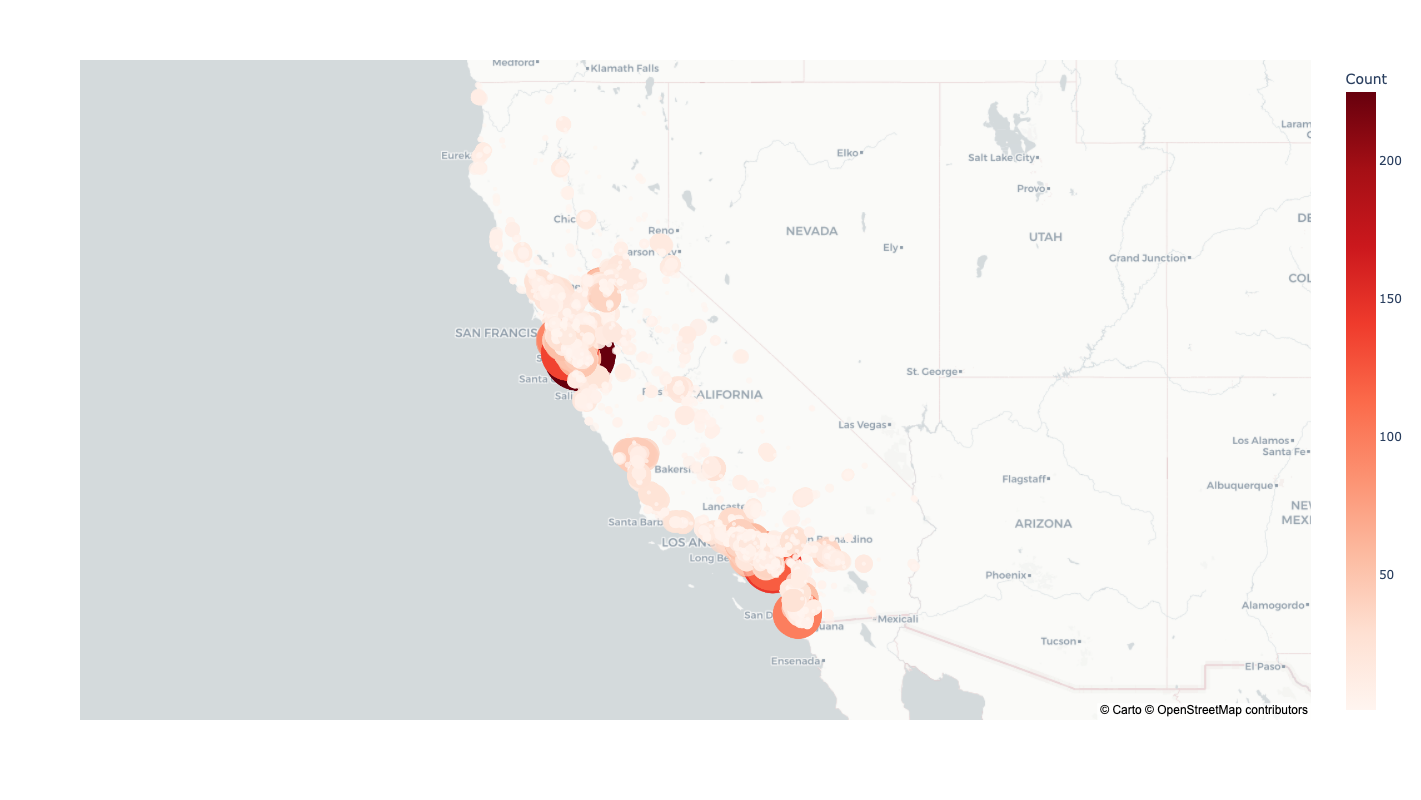

In [57]:
import pandas as pd


# Filter data for California
data_ca = filtered_data4[filtered_data4['State'] == 'CA']
# Count the number of stations per ZIP code in California
zip_counts_ca = data_ca['ZIP'].value_counts().reset_index()
zip_counts_ca.columns = ['ZIP', 'Count']
# Merge the counts with original data to get latitude and longitude for each ZIP
merged_data_ca = pd.merge(data_ca[['ZIP', 'Latitude', 'Longitude']].drop_duplicates(), zip_counts_ca, on='ZIP')
import plotly.express as px

# Make sure you have a valid Mapbox access token
mapbox_token = 'your_mapbox_token'  # Replace with your Mapbox access token
px.set_mapbox_access_token(mapbox_token)

# Create a scatter mapbox for California
fig = px.scatter_mapbox(merged_data_ca,
                        lat='Latitude',
                        lon='Longitude',
                        color='Count',
                        size='Count',
                        color_continuous_scale="reds",
                        size_max=50,
                        zoom=5,  # Adjust zoom level to focus on California
                        center={"lat": 36.7783, "lon": -119.4179},  # Center on California
                        mapbox_style="carto-positron",
                        hover_name='ZIP',
                        hover_data={'Latitude': True, 'Longitude': True, 'Count': True}
                       )
# Adjust the layout to make the map larger
fig.update_layout(
    width=1200,  # Set the width to a larger size
    height=800   # Set the height to a larger size
)

# Show the map
fig.show()



## Fuel Price

In [58]:
# Loading data 
file_path = '/Users/ngtrg_/Desktop/California Data/CSV/fuel.xlsx'

# Read sheet "Data1" and skip the first 3 rows
df2 = pd.read_excel(file_path, sheet_name='Data 1', skiprows=2)

# Select columns 'Date' and 'U.S. All Grades All Formulations Retail Gasoline Prices (Dollars per Gallon)'
df2 = df2[['Date', 'U.S. All Grades All Formulations Retail Gasoline Prices (Dollars per Gallon)']]

# Format 'Date' to datetime
df2['Date'] = pd.to_datetime(df2['Date'])

# Delete years before 2010 and after 2023
df2 = df2[(df2['Date'].dt.year >= 2010) & (df2['Date'].dt.year <= 2023)]

# Set up column 'Date' as index
df2.set_index('Date', inplace=True)

# Averaged by quarter
fuel_quarterly_mean = df2.resample('Q').mean()
# Đưa cột 'Date' trở lại làm cột bình thường
fuel_quarterly_mean_reset = fuel_quarterly_mean.reset_index()

# Delete 'Date' column
fuel_quarterly_mean_no_date = fuel_quarterly_mean_reset.drop(columns=['Date'])

# Display the results
print(fuel_quarterly_mean_no_date)



    U.S. All Grades All Formulations Retail Gasoline Prices (Dollars per Gallon)
0                                        2.7640000000                           
1                                        2.8583333333                           
2                                        2.7740000000                           
3                                        2.9380000000                           
4                                        3.3423333333                           
5                                        3.8490000000                           
6                                        3.6893333333                           
7                                        3.4250000000                           
8                                        3.6623333333                           
9                                        3.7816666667                           
10                                       3.7293333333                           
11                          

## Electricity Price

In [59]:
import pandas as pd

# Loading data 
file_path = '/Users/ngtrg_/Desktop/California Data/CSV/electricity.xlsx'

# Read sheet "Data1" and skip the first 3 lines
df1 = pd.read_excel(file_path, skiprows=10)
# Rename column
df1 = df1.rename(columns={'APU000072610': 'Electricity Price'})

# Format observation_date to datetime
df1['observation_date'] = pd.to_datetime(df1['observation_date'])

# Filter rows that satisfy the observation_date condition from 2010 to 2023
df_filtered1 = df1[(df1['observation_date'].dt.year >= 2010) & (df1['observation_date'].dt.year <= 2023)]

# Group data by year and quarter, calculate the average value of Electricity Price
df_filtered1['year'] = df_filtered1['observation_date'].dt.year
df_filtered1['quarter'] = df_filtered1['observation_date'].dt.quarter

# Calculate the average value for each year and quarter
electricity_df_avg = df_filtered1.groupby(['year', 'quarter']).agg({'Electricity Price': 'mean'}).reset_index()

# Print the results 
electricity_df_avg

/var/folders/db/j44xpl_d6sg85_vp_lyv00br0000gn/T/ipykernel_19394/4174781418.py:18: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/db/j44xpl_d6sg85_vp_lyv00br0000gn/T/ipykernel_19394/4174781418.py:19: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



year  quarter  Electricity Price
0   2010        1       0.1240000000
1   2010        2       0.1283333333
2   2010        3       0.1326666667
3   2010        4       0.1256666667
4   2011        1       0.1256666667
5   2011        2       0.1300000000
6   2011        3       0.1350000000
7   2011        4       0.1283333333
8   2012        1       0.1276666667
9   2012        2       0.1303333333
10  2012        3       0.1330000000
11  2012        4       0.1273333333
12  2013        1       0.1286666667
13  2013        2       0.1320000000
14  2013        3       0.1370000000
15  2013        4       0.1310000000
16  2014        1       0.1343333333
17  2014        2       0.1366666667
18  2014        3       0.1423333333
19  2014        4       0.1350000000
20  2015        1       0.1373333333
21  2015        2       0.1390000000
22  2015        3       0.1416666667
23  2015        4       0.1343333333
24  2016        1       0.1340000000
25  2016        2       0.1350000000
26  2016        3       0.1390000000
27  2016        4       0.1326666667
28  2017        1       0.1343333333
29  2017        2       0.1380000000
30  2017        3       0.1423333333
31  2017        4       0.1363333333
32  2018        1       0.1350000000
33  2018        2       0.1363333333
34  2018        3       0.1386666667
35  2018        4       0.1350000000
36  2019        1       0.1353333333
37  2019        2       0.1366666667
38  2019        3       0.1393333333
39  2019        4       0.1340000000
40  2020        1       0.1340000000
41  2020        2       0.1346666667
42  2020        3       0.1370000000
43  2020        4       0.1356666667
44  2021        1       0.1370000000
45  2021        2       0.1403333333
46  2021        3       0.1436666667
47  2021        4       0.1420000000
48  2022        1       0.1483333333
49  2022        2       0.1550000000
50  2022        3       0.1660000000
51  2022        4       0.1646666667
52  2023        1       0.1673333333
53  2023        2       0.1666666667
54  2023        3       0.1700000000
55  2023        4       0.1686666667

## Personal Income

In [60]:
import pandas as pd

# Loading data 
file_path = '/Users/ngtrg_/Desktop/California Data/CSV/personal_income.xlsx'

# Read the Excel file and skip the first 10 rows
df = pd.read_excel(file_path, skiprows=10)

# Rename column
df = df.rename(columns={'CAOTOT': 'Personal Income'})

# Convert observation_date column to datetime
df['observation_date'] = pd.to_datetime(df['observation_date'])

# Filter rows that satisfy the observation_date condition from 2010 to 2023
df_filtered = df[(df['observation_date'].dt.year >= 2010) & (df['observation_date'].dt.year <= 2023)]

# Group data by year and quarter, calculate the average value of Electricity Price
df_filtered['year'] = df_filtered['observation_date'].dt.year
df_filtered['quarter'] = df_filtered['observation_date'].dt.quarter

# Select only the columns 'year', 'quarter', and 'Personal Income'
personal_income_avg = df_filtered[['year','observation_date', 'quarter', 'Personal Income']].reset_index(drop=True)

# Print the results
personal_income_avg

/var/folders/db/j44xpl_d6sg85_vp_lyv00br0000gn/T/ipykernel_19394/3951392643.py:19: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/db/j44xpl_d6sg85_vp_lyv00br0000gn/T/ipykernel_19394/3951392643.py:20: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



year observation_date  quarter    Personal Income
0   2010       2010-01-01        1 1576815.7000000000
1   2010       2010-04-01        2 1604032.1000000001
2   2010       2010-07-01        3 1609613.5000000000
3   2010       2010-10-01        4 1649528.6000000001
4   2011       2011-01-01        1 1696444.5000000000
5   2011       2011-04-01        2 1704323.8999999999
6   2011       2011-07-01        3 1725292.8000000000
7   2011       2011-10-01        4 1727650.8999999999
8   2012       2012-01-01        1 1775723.2000000000
9   2012       2012-04-01        2 1796915.3999999999
10  2012       2012-07-01        3 1794568.1000000001
11  2012       2012-10-01        4 1891845.3999999999
12  2013       2013-01-01        1 1801626.6000000001
13  2013       2013-04-01        2 1833423.1000000001
14  2013       2013-07-01        3 1851647.7000000000
15  2013       2013-10-01        4 1876843.6000000001
16  2014       2014-01-01        1 1902645.1000000001
17  2014       2014-04-01        2 1937630.8999999999
18  2014       2014-07-01        3 1976434.3000000000
19  2014       2014-10-01        4 2006161.7000000000
20  2015       2015-01-01        1 2055502.8000000000
21  2015       2015-04-01        2 2089561.3000000000
22  2015       2015-07-01        3 2111103.3999999999
23  2015       2015-10-01        4 2132030.7999999998
24  2016       2016-01-01        1 2160710.8999999999
25  2016       2016-04-01        2 2174042.2000000002
26  2016       2016-07-01        3 2202555.5000000000
27  2016       2016-10-01        4 2227243.5000000000
28  2017       2017-01-01        1 2251305.8999999999
29  2017       2017-04-01        2 2278666.8999999999
30  2017       2017-07-01        3 2307389.8999999999
31  2017       2017-10-01        4 2342831.8999999999
32  2018       2018-01-01        1 2359551.7000000002
33  2018       2018-04-01        2 2395471.7999999998
34  2018       2018-07-01        3 2430234.2999999998
35  2018       2018-10-01        4 2458962.7000000002
36  2019       2019-01-01        1 2500309.8999999999
37  2019       2019-04-01        2 2527505.2999999998
38  2019       2019-07-01        3 2542313.2999999998
39  2019       2019-10-01        4 2581673.8999999999
40  2020       2020-01-01        1 2620751.7999999998
41  2020       2020-04-01        2 2782204.5000000000
42  2020       2020-07-01        3 2853265.6000000001
43  2020       2020-10-01        4 2813863.6000000001
44  2021       2021-01-01        1 3097752.7000000002
45  2021       2021-04-01        2 2972063.1000000001
46  2021       2021-07-01        3 2997363.8999999999
47  2021       2021-10-01        4 2987527.8999999999
48  2022       2022-01-01        1 2969021.5000000000
49  2022       2022-04-01        2 2979888.0000000000
50  2022       2022-07-01        3 3018949.2000000002
51  2022       2022-10-01        4 3058730.5000000000
52  2023       2023-01-01        1 3083103.8999999999
53  2023       2023-04-01        2 3123601.1000000001
54  2023       2023-07-01        3 3145936.8999999999
55  2023       2023-10-01        4 3155988.3999999999

In [61]:
# Extract the 'column_name' column from each DataFrame
col1 = quarterly_ev_totals['Number of Vehicles']
col2 = stations_quarterly_counts['Charging Stations Count']
col3 = fuel_quarterly_mean_no_date['U.S. All Grades All Formulations Retail Gasoline Prices (Dollars per Gallon)']
col4 = electricity_df_avg['Electricity Price']
col5 = personal_income_avg['Personal Income']
col6 = personal_income_avg['year']
col7 = personal_income_avg['quarter']

# Concatenate the columns into a single DataFrame
merged_df = pd.concat([col6, col7, col1, col2, col3, col4, col5], axis=1)

# Name the columns in the new DataFrame
merged_df.columns = ['Year', 'Quarter', 'Number of Vehicles', 'Charging Stations Count', 'U.S. All Grades All Formulations Retail Gasoline Prices (Dollars per Gallon)', 'Electricity Price', 'Personal Income']

# Display the resulting DataFrame
merged_df

Year  Quarter  Number of Vehicles  Charging Stations Count  \
0   2010        1                   4                        1   
1   2010        2                 358                        1   
2   2010        3                 108                        0   
3   2010        4                  12                        2   
4   2011        1                  71                       77   
5   2011        2                2981                        1   
6   2011        3                1995                        5   
7   2011        4                  32                       25   
8   2012        1                  52                       43   
9   2012        2                3244                       22   
10  2012        3                1721                       17   
11  2012        4                 138                       15   
12  2013        1                2274                       44   
13  2013        2                6943                       20   
14  2013        3               11865                       28   
15  2013        4                  85                       21   
16  2014        1                1620                       35   
17  2014        2               15656                       34   
18  2014        3               12030                       64   
19  2014        4                 214                       65   
20  2015        1                   0                       80   
21  2015        2               20488                      117   
22  2015        3               17446                       83   
23  2015        4                 435                       73   
24  2016        1                4232                       85   
25  2016        2               18212                       56   
26  2016        3               14759                       65   
27  2016        4                 426                       62   
28  2017        1                1598                       63   
29  2017        2               17256                       64   
30  2017        3               26682                       51   
31  2017        4                 436                       79   
32  2018        1                   0                      170   
33  2018        2               32390                       86   
34  2018        3               61392                      112   
35  2018        4                1266                       77   
36  2019        1                2434                      108   
37  2019        2               23770                       82   
38  2019        3               68079                      125   
39  2019        4                 320                      123   
40  2020        1                2547                      311   
41  2020        2               38056                     1679   
42  2020        3               65104                      204   
43  2020        4                 239                      254   
44  2021        1               32752                     3813   
45  2021        2               37335                      373   
46  2021        3               43337                      461   
47  2021        4               46842                      643   
48  2022        1               59364                      531   
49  2022        2               58946                      738   
50  2022        3               65204                      640   
51  2022        4               78562                      593   
52  2023        1               85580                      578   
53  2023        2              102602                      723   
54  2023        3               99980                      519   
55  2023        4               86506                      533   

    U.S. All Grades All Formulations Retail Gasoline Prices (Dollars per Gallon)  \
0                                        2.7640000000                              
1                                        2.8583333333                    

In [62]:

merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56 entries, 0 to 55
Data columns (total 7 columns):
 #   Column                                                                        Non-Null Count  Dtype  
---  ------                                                                        --------------  -----  
 0   Year                                                                          56 non-null     int32  
 1   Quarter                                                                       56 non-null     int32  
 2   Number of Vehicles                                                            56 non-null     int64  
 3   Charging Stations Count                                                       56 non-null     int64  
 4   U.S. All Grades All Formulations Retail Gasoline Prices (Dollars per Gallon)  56 non-null     float64
 5   Electricity Price                                                             56 non-null     float64
 6   Personal Income                      

In [63]:
merged_df.to_excel('merged_df.xlsx', index=False)


# Get descriptive statistics for all numerical variables
merged_df.describe()

Year       Quarter  Number of Vehicles  \
count   56.0000000000 56.0000000000       56.0000000000   
mean  2016.5000000000  2.5000000000    22785.3571428571   
std      4.0676104220  1.1281521496    29803.6644503680   
min   2010.0000000000  1.0000000000        0.0000000000   
25%   2013.0000000000  1.7500000000      409.0000000000   
50%   2016.5000000000  2.5000000000     5587.5000000000   
75%   2020.0000000000  3.2500000000    37515.2500000000   
max   2023.0000000000  4.0000000000   102602.0000000000   

       Charging Stations Count  \
count            56.0000000000   
mean            265.6071428571   
std             565.1820198701   
min               0.0000000000   
25%              34.7500000000   
50%              78.0000000000   
75%             268.2500000000   
max            3813.0000000000   

       U.S. All Grades All Formulations Retail Gasoline Prices (Dollars per Gallon)  \
count                                      56.0000000000                              
mean                                        3.0689166667                              
std                                         0.6069045796                              
min                                         2.0000000000                              
25%                                         2.6123333333                              
50%                                         2.9406666667                              
75%                                         3.6356666667                              
max                                         4.5966666667                              

       Electricity Price    Personal Income  
count      56.0000000000      56.0000000000  
mean        0.1387559524 2313002.6357142855  
std         0.0113364507  500064.2099646454  
min         0.1240000000 1576815.7000000000  
25%         0.1329166667 1870544.6250000000  
50%         0.1355000000 2239274.7000000002  
75%         0.1395833333 2790119.2749999999  
max         0.1700000000 3155988.3999999999

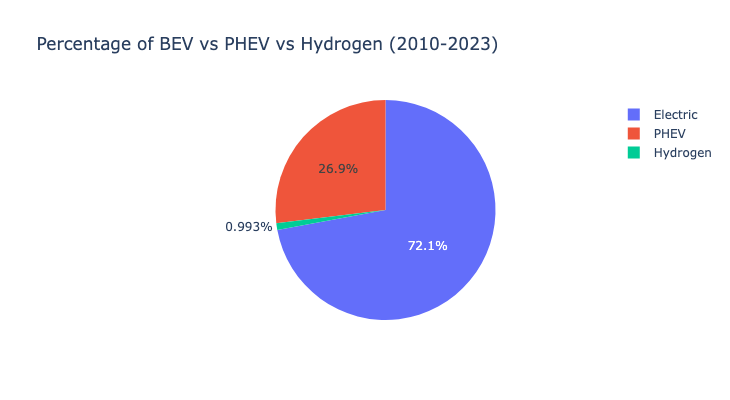

In [64]:
#Percentage of BEV vs PHEV

import plotly.express as px

# Filter for years 2010 to 2023
filtered_years_df5 = df5[(df5['Data_Year'] >= 2010) & (df5['Data_Year'] <= 2023)]

# Filter for relevant fuel types
filtered_df5 = filtered_years_df5[filtered_years_df5['FUEL_TYPE'].isin(['Electric', 'PHEV', 'Hydrogen'])]

# Calculate the count of each type
vehicle_counts = filtered_df5.groupby('FUEL_TYPE')['Number of Vehicles'].sum()

# Compute the percentage of each type
total_vehicles = vehicle_counts.sum()
percentages = (vehicle_counts / total_vehicles) * 100

# Prepare data for the pie chart
vehicle_types = percentages.index
values = percentages.values

# Create a pie chart
fig = px.pie(names=vehicle_types, values=values, title='Percentage of BEV vs PHEV vs Hydrogen (2010-2023)', height=400)
fig.show()


/Users/ngtrg_/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/Users/ngtrg_/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



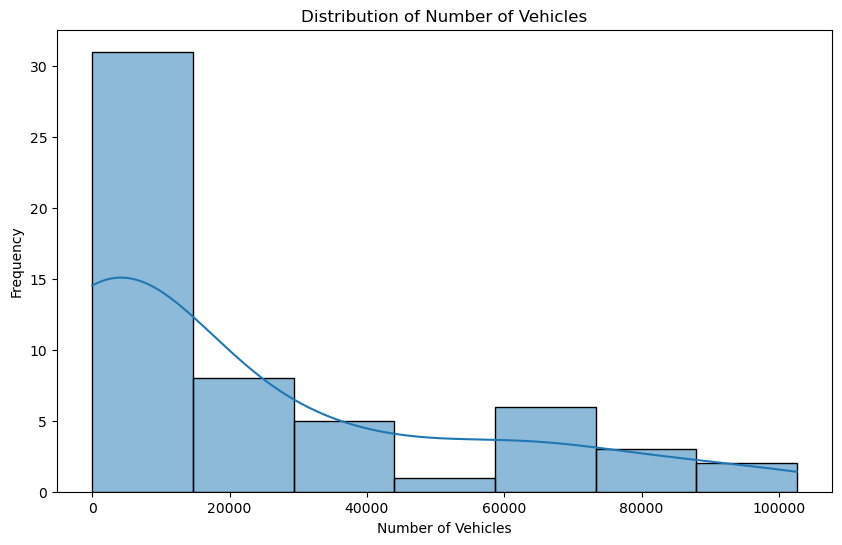

/Users/ngtrg_/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/Users/ngtrg_/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/Users/ngtrg_/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead



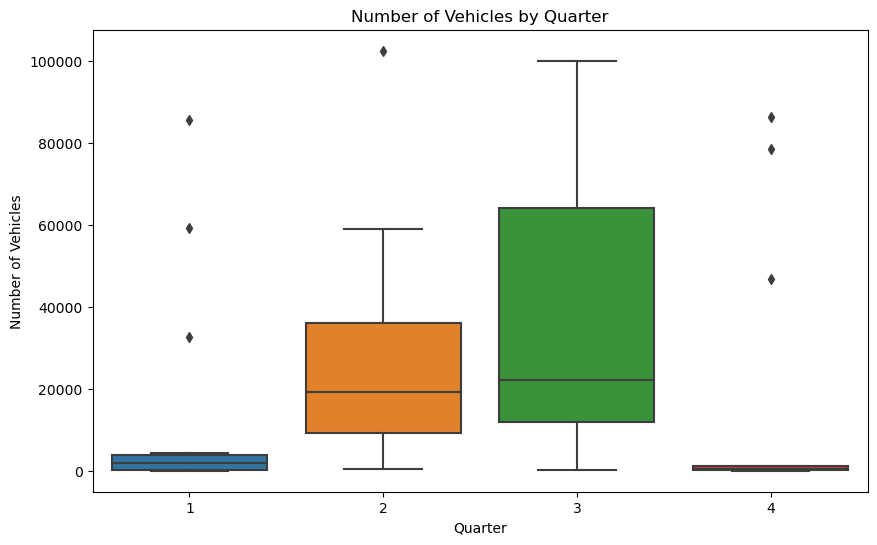

/Users/ngtrg_/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/Users/ngtrg_/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead



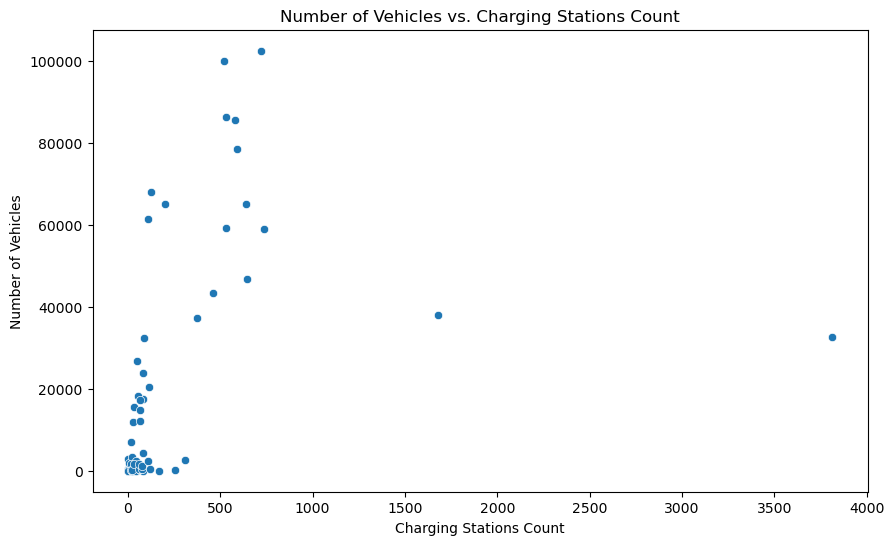

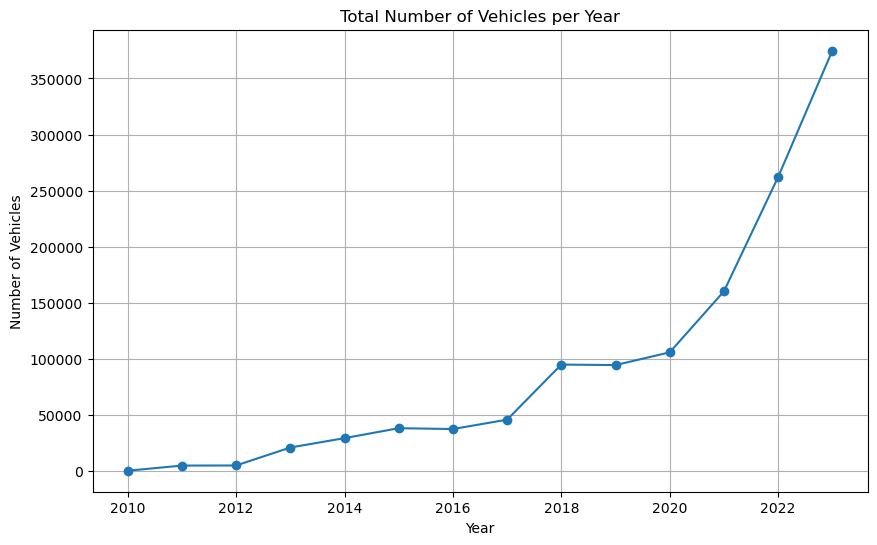

/Users/ngtrg_/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/Users/ngtrg_/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/Users/ngtrg_/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead



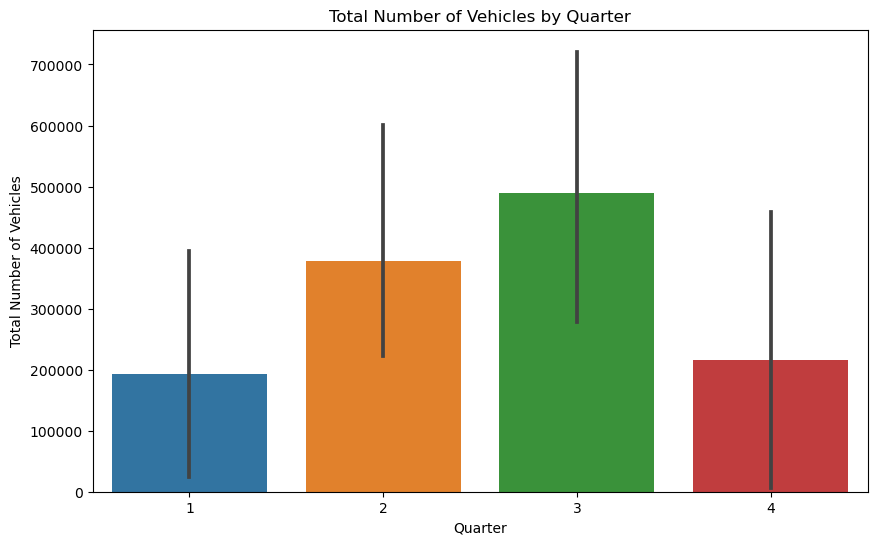

In [65]:

import matplotlib.pyplot as plt
import seaborn as sns

# Filter the DataFrame for electric vehicles
electric_vehicles_df = filtered_df5[filtered_df5['FUEL_TYPE'] == 'Electric']

# 1. Histograms and Density Plots
plt.figure(figsize=(10, 6))
sns.histplot(merged_df['Number of Vehicles'], kde=True)
plt.title('Distribution of Number of Vehicles')
plt.xlabel('Number of Vehicles')
plt.ylabel('Frequency')
plt.show()

# 2. Box Plots
plt.figure(figsize=(10, 6))
sns.boxplot(x='Quarter', y='Number of Vehicles', data=merged_df)
plt.title('Number of Vehicles by Quarter')
plt.xlabel('Quarter')
plt.ylabel('Number of Vehicles')
plt.show()

# 3. Scatter Plots
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Charging Stations Count', y='Number of Vehicles', data=merged_df)
plt.title('Number of Vehicles vs. Charging Stations Count')
plt.xlabel('Charging Stations Count')
plt.ylabel('Number of Vehicles')
plt.show()

# 4. Line Plots

df_yearly = merged_df.groupby('Year')['Number of Vehicles'].sum().reset_index()

plt.figure(figsize=(10, 6))
plt.plot(df_yearly['Year'], df_yearly['Number of Vehicles'], marker='o', linestyle='-')
plt.xlabel('Year')
plt.ylabel('Number of Vehicles')
plt.title('Total Number of Vehicles per Year')
plt.grid(True)
plt.show()

# 5. Bar Plots
plt.figure(figsize=(10, 6))
sns.barplot(x='Quarter', y='Number of Vehicles', data=merged_df, estimator=sum)
plt.title('Total Number of Vehicles by Quarter')
plt.xlabel('Quarter')
plt.ylabel('Total Number of Vehicles')
plt.show()


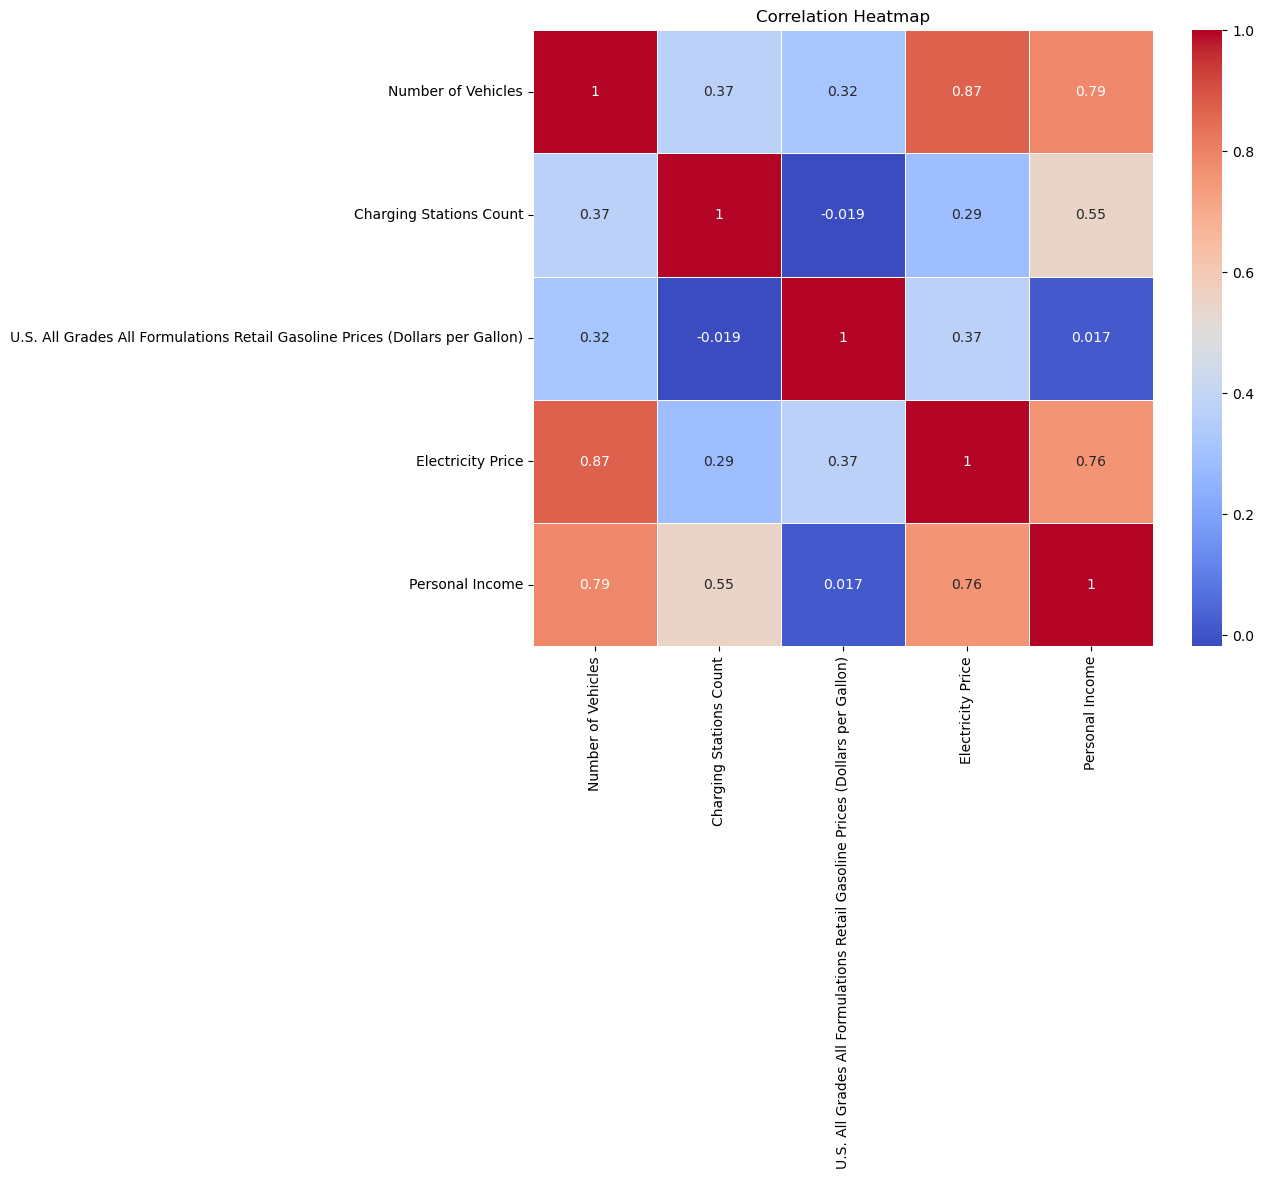

In [66]:
# Select specific columns
selected_columns = ['Number of Vehicles', 
                    'Charging Stations Count', 
                    'U.S. All Grades All Formulations Retail Gasoline Prices (Dollars per Gallon)', 
                    'Electricity Price', 
                    'Personal Income']

df_selected = merged_df[selected_columns]

# Calculate the correlation matrix
corr_matrix = df_selected.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


/Users/ngtrg_/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/Users/ngtrg_/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/Users/ngtrg_/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/Users/ngtrg_/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/Users/ngtrg_/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is d

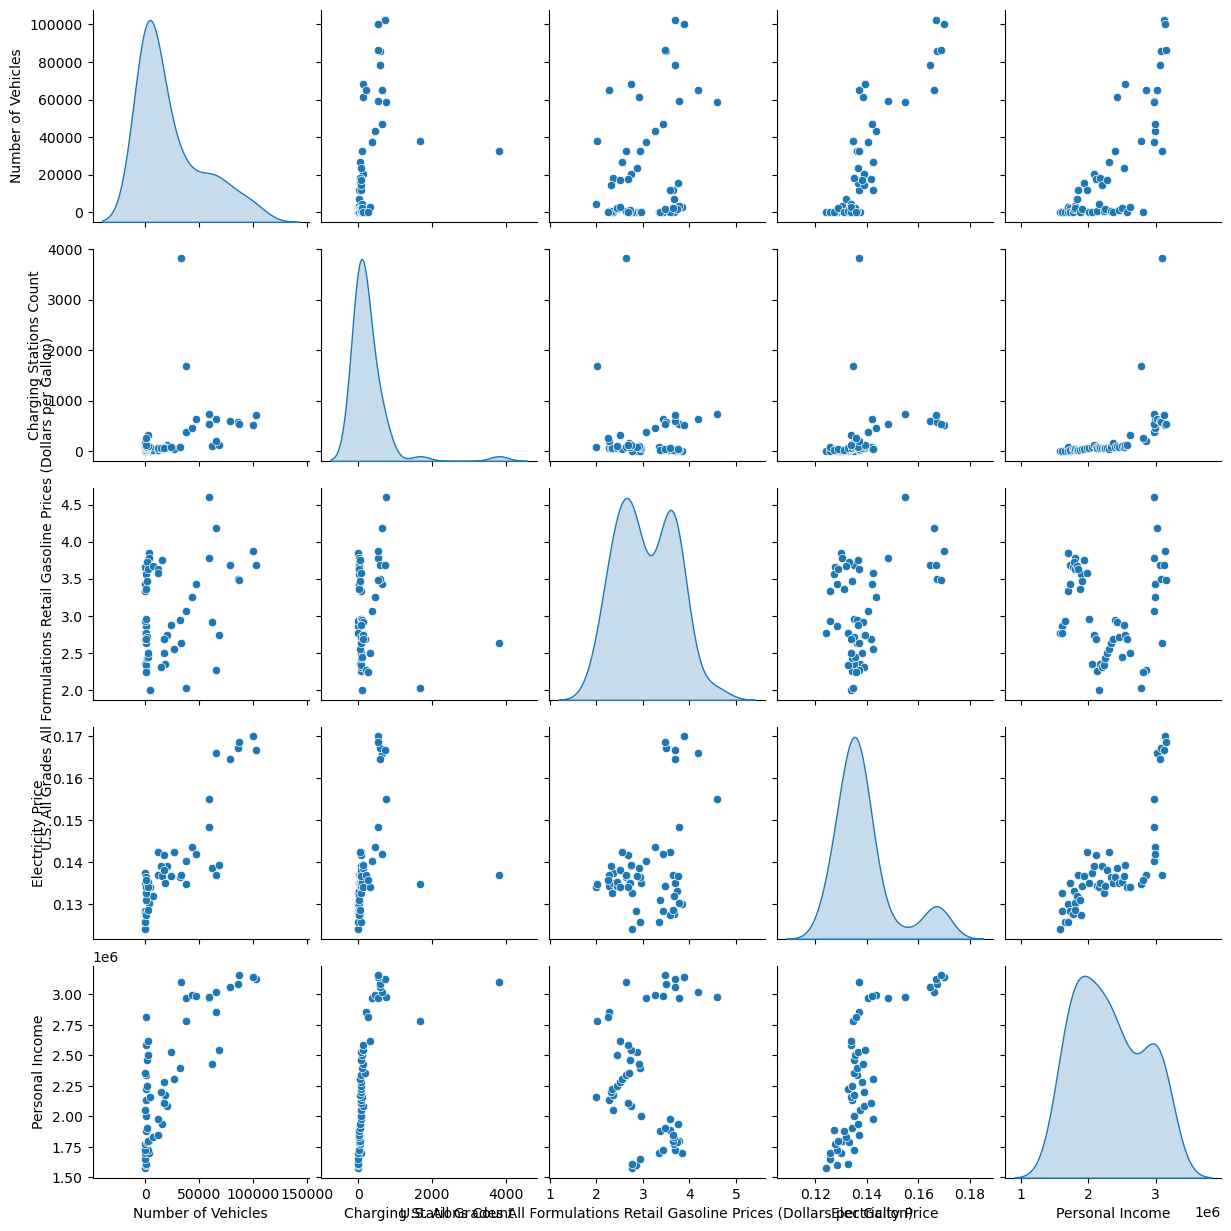

In [67]:
plot=merged_df[[ "Number of Vehicles",
    "Charging Stations Count",
    "U.S. All Grades All Formulations Retail Gasoline Prices (Dollars per Gallon)",
    "Electricity Price",
    "Personal Income"]]

sns.pairplot(plot, diag_kind='kde')
plt.show()

Mean Squared Error: 145786045.3078234


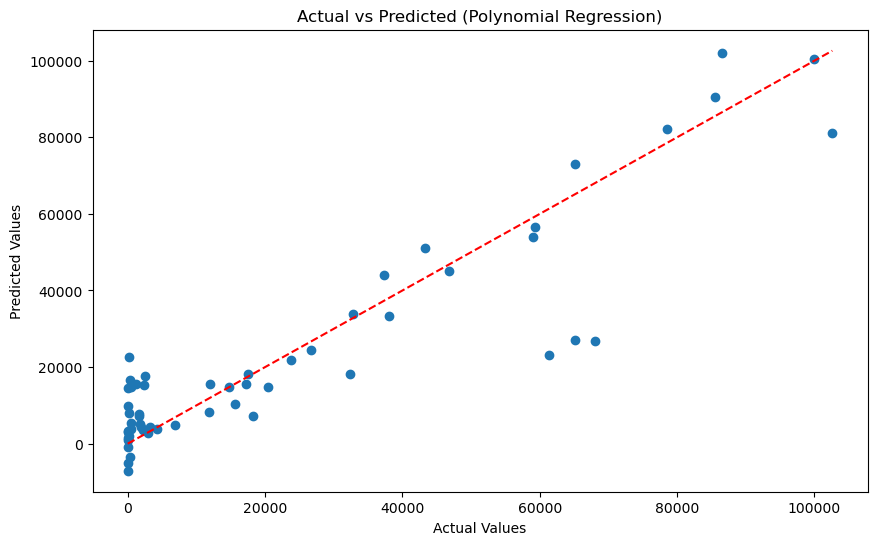

In [68]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

independent_vars = [
    'Charging Stations Count',
    'Electricity Price',
    'U.S. All Grades All Formulations Retail Gasoline Prices (Dollars per Gallon)',
    'Personal Income'
]
dependent_var = 'Number of Vehicles'

X = merged_df[independent_vars]
y = merged_df[dependent_var]

# 2nd order polynomial regression
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

model = LinearRegression()
model.fit(X_poly, y)

# Predictions and reviews
predictions = model.predict(X_poly)
mse = mean_squared_error(y, predictions)
print(f'Mean Squared Error: {mse}')

# Scatter plot of prediction and reality
plt.figure(figsize=(10, 6))
plt.scatter(y, predictions)
plt.plot([y.min(), y.max()], [y.min(), y.max()], '--', color='red')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted (Polynomial Regression)')
plt.show()


## Forecasting

In [69]:
merged_df.columns

Index(['Year', 'Quarter', 'Number of Vehicles', 'Charging Stations Count',
       'U.S. All Grades All Formulations Retail Gasoline Prices (Dollars per Gallon)',
       'Electricity Price', 'Personal Income'],
      dtype='object')

In [70]:

total = merged_df['Number of Vehicles'].sum()
total


1275980

In [71]:
merged_df

Year  Quarter  Number of Vehicles  Charging Stations Count  \
0   2010        1                   4                        1   
1   2010        2                 358                        1   
2   2010        3                 108                        0   
3   2010        4                  12                        2   
4   2011        1                  71                       77   
5   2011        2                2981                        1   
6   2011        3                1995                        5   
7   2011        4                  32                       25   
8   2012        1                  52                       43   
9   2012        2                3244                       22   
10  2012        3                1721                       17   
11  2012        4                 138                       15   
12  2013        1                2274                       44   
13  2013        2                6943                       20   
14  2013        3               11865                       28   
15  2013        4                  85                       21   
16  2014        1                1620                       35   
17  2014        2               15656                       34   
18  2014        3               12030                       64   
19  2014        4                 214                       65   
20  2015        1                   0                       80   
21  2015        2               20488                      117   
22  2015        3               17446                       83   
23  2015        4                 435                       73   
24  2016        1                4232                       85   
25  2016        2               18212                       56   
26  2016        3               14759                       65   
27  2016        4                 426                       62   
28  2017        1                1598                       63   
29  2017        2               17256                       64   
30  2017        3               26682                       51   
31  2017        4                 436                       79   
32  2018        1                   0                      170   
33  2018        2               32390                       86   
34  2018        3               61392                      112   
35  2018        4                1266                       77   
36  2019        1                2434                      108   
37  2019        2               23770                       82   
38  2019        3               68079                      125   
39  2019        4                 320                      123   
40  2020        1                2547                      311   
41  2020        2               38056                     1679   
42  2020        3               65104                      204   
43  2020        4                 239                      254   
44  2021        1               32752                     3813   
45  2021        2               37335                      373   
46  2021        3               43337                      461   
47  2021        4               46842                      643   
48  2022        1               59364                      531   
49  2022        2               58946                      738   
50  2022        3               65204                      640   
51  2022        4               78562                      593   
52  2023        1               85580                      578   
53  2023        2              102602                      723   
54  2023        3               99980                      519   
55  2023        4               86506                      533   

    U.S. All Grades All Formulations Retail Gasoline Prices (Dollars per Gallon)  \
0                                        2.7640000000                              
1                                        2.8583333333                    

In [72]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Features and Target
X = merged_df[['Charging Stations Count', 'Electricity Price', 'U.S. All Grades All Formulations Retail Gasoline Prices (Dollars per Gallon)', 'Personal Income']]
Y = merged_df['Number of Vehicles']

# Standardizing the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Linear Regression
linear_model = LinearRegression()
linear_model.fit(X_scaled, Y)
linear_predictions = linear_model.predict(X_scaled)
linear_rmse = np.sqrt(mean_squared_error(Y, linear_predictions))
linear_mae = mean_absolute_error(Y, linear_predictions)
print("Linear Regression RMSE:", linear_rmse)
print("Linear Regression MAE:", linear_mae)

# Ridge Regression with Hyperparameter Tuning
ridge_params = {'alpha': [0.1, 1.0, 10.0, 100.0]}
ridge_grid = GridSearchCV(Ridge(), ridge_params, cv=5)
ridge_grid.fit(X_scaled, Y)
best_ridge = ridge_grid.best_estimator_
ridge_predictions = best_ridge.predict(X_scaled)
ridge_rmse = np.sqrt(mean_squared_error(Y, ridge_predictions))
ridge_mae = mean_absolute_error(Y, ridge_predictions)
print("Ridge Regression RMSE:", ridge_rmse)
print("Ridge Regression MAE:", ridge_mae)
print("Best Ridge Params:", ridge_grid.best_params_)

# Lasso Regression with Hyperparameter Tuning
lasso_params = {'alpha': [0.1, 1.0, 10.0, 100.0]}
lasso_grid = GridSearchCV(Lasso(), lasso_params, cv=5)
lasso_grid.fit(X_scaled, Y)
best_lasso = lasso_grid.best_estimator_
lasso_predictions = best_lasso.predict(X_scaled)
lasso_rmse = np.sqrt(mean_squared_error(Y, lasso_predictions))
lasso_mae = mean_absolute_error(Y, lasso_predictions)
print("Lasso Regression RMSE:", lasso_rmse)
print("Lasso Regression MAE:", lasso_mae)
print("Best Lasso Params:", lasso_grid.best_params_)

model_performance = {
    'Linear Regression': {'RMSE': linear_rmse, 'model': linear_model},
    'Ridge Regression': {'RMSE': ridge_rmse, 'model': best_ridge},
    'Lasso Regression': {'RMSE': lasso_rmse, 'model': best_lasso}
}

best_model_name = min(model_performance, key=lambda x: model_performance[x]['RMSE'])
best_model = model_performance[best_model_name]['model']

print(f"Best Model: {best_model_name}")

Linear Regression RMSE: 13063.96123623215
Linear Regression MAE: 9156.877300007138
Ridge Regression RMSE: 13319.8176012922
Ridge Regression MAE: 9389.727552977423
Best Ridge Params: {'alpha': 10.0}
Lasso Regression RMSE: 13064.840336025632
Lasso Regression MAE: 9157.771048414912
Best Lasso Params: {'alpha': 100.0}
Best Model: Linear Regression


In [116]:
import pandas as pd
from sklearn import linear_model

pd.set_option('display.float_format', lambda x: '%.10f' % x)
np.set_printoptions(suppress=True)

# Prepare the feature matrix (X) and target vector (Y)
X = merged_df[['Charging Stations Count', 'Electricity Price', 'U.S. All Grades All Formulations Retail Gasoline Prices (Dollars per Gallon)', 'Personal Income']]
Y = merged_df['Number of Vehicles']

# Initialize the linear regression model
regr = linear_model.LinearRegression()

# Fit the model with the data
regr.fit(X, Y)

# Print the coefficients
print("Coefficients: ", regr.coef_)
print("Intercept: ", regr.intercept_)

# Make predictions
predictions = regr.predict(X)

# Evaluate the model
from sklearn.metrics import mean_squared_error, mean_absolute_error

rmse = mean_squared_error(Y, predictions, squared=False)
mae = mean_absolute_error(Y, predictions)
print("RMSE:", rmse)
print("MAE:", mae)


Coefficients:  [      1.38064636 1517062.69660619    4641.50434092       0.01983215]
Intercept:  -248199.04465751888
RMSE: 13063.961236232146
MAE: 9156.877304978689


In [117]:
equation = f"Number of Vehicles = {regr.intercept_:.2f} + {regr.coef_[0]:.2f} * merged_df['Charging Stations Count'] + {regr.coef_[1]:.2f} * merged_df['Electricity Price'] + {regr.coef_[2]:.2f} * merged_df['U.S. All Grades All Formulations Retail Gasoline Prices (Dollars per Gallon)'] + {regr.coef_[3]:.2f} * merged_df['Personal Income']"

equation

"Number of Vehicles = -248199.04 + 1.38 * merged_df['Charging Stations Count'] + 1517062.70 * merged_df['Electricity Price'] + 4641.50 * merged_df['U.S. All Grades All Formulations Retail Gasoline Prices (Dollars per Gallon)'] + 0.02 * merged_df['Personal Income']"

## Baseline Scenario:  2.4 million ZEVs in 2030; 4 million in 2045 (13% ZEV fleet)



In [124]:
# Assume the number of electric vehicles from the scenarios
ev_2030 = 2400000
ev_2045 = 4000000

# Assume each charging station serves an average of 100 vehicles per day
average_usage_per_station_per_day = 100

# Calculate the number of charging stations required
stations_needed_2030 = ev_2030 / average_usage_per_station_per_day
stations_needed_2045 = ev_2045 / average_usage_per_station_per_day

print("Public stations needed by 2030:", stations_needed_2030)
print("Public stations needed by 2045:", stations_needed_2045)


Public stations needed by 2030: 24000.0
Public stations needed by 2045: 40000.0


## Scenario 2: Reach 100% sales by 2035:  14.2 million ZEVs in 2035; 27.9 million in 2045 (85% ZEV fleet) 



In [120]:
# Assume the number of electric vehicles from the scenarios
ev_2035 = 14000000
ev_2045 = 27900000

# Assume each charging station serves an average of 100 vehicles per day
average_usage_per_station_per_day = 100

# Calculate the number of charging stations required
stations_needed_2030 = ev_2030 / average_usage_per_station_per_day
stations_needed_2045 = ev_2045 / average_usage_per_station_per_day

print("Public stations needed by 2030:", stations_needed_2030)
print("Public stations needed by 2045:", stations_needed_2045)


Public stations needed by 2030: 140000.0
Public stations needed by  2045: 279000.0


## Scenario 3: Reach 100% sales by 2030: 10.6 million ZEVs in 2030; 33 million in 2045 (100% ZEV fleet)

In [127]:
# Assume number of EVs
ev_2030 = 10600000
ev_2045 = 33000000

# Assume each charging station serves an average of 100 vehicles per day
average_usage_per_station_per_day = 100

# Calculate the number of charging stations required
stations_needed_2030 = ev_2030 / average_usage_per_station_per_day
stations_needed_2045 = ev_2045 / average_usage_per_station_per_day

print("Public stations needed by 2030:", stations_needed_2030)
print("Public stations needed by 2045:", stations_needed_2045)


Public stations needed by 2030: 117777.77777777778
Public stations needed by 2045: 366666.6666666667
